# AMAZON SALES ANALYSIS
# Name - Nabeel Ghalib
# Date - 20-04-2024

## Problem Statement:
 Sales management has gained importance to meet increasing competition and the need for improved methods of distribution to reduce cost and to increase profits. Sales management today is the most important function in a commercial and business enterprise.

## Ask
## The key business task is to find patterns , sales trend etc
*  Total Profit and Total Revenue
*  Top items by region
*  Top regions by revenue , profit
*  Year wise trend

## Data Sources Used
  The dataset is provided by Unified Mentor Private Limited for my data analytics internship with them.

## Tools Used
* Python (Google Colab) - Data cleaning , Analysis and Visualization
* Tableau - Data Visualization


# Preparing the Data

In [ ]:
# importing required packages

import numpy as np
import pandas as pd

# Packages for Visualization

import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
#importing the data set

df = pd.read_csv('/content/amazonsalesfinal - Copy.csv')

In [ ]:
df.head()

,region,country,item_type,sales_channel,order_priority,order_date,order_id,ship_date,units_sold,unit_price,unit_cost,total_revenue,total_cost,total_profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   region          100 non-null    object 
 1   country         100 non-null    object 
 2   item_type       100 non-null    object 
 3   sales_channel   100 non-null    object 
 4   order_priority  100 non-null    object 
 5   order_date      100 non-null    object 
 6   order_id        100 non-null    int64  
 7   ship_date       100 non-null    object 
 8   units_sold      100 non-null    int64  
 9   unit_price      100 non-null    float64
 10  unit_cost       100 non-null    float64
 11  total_revenue   100 non-null    float64
 12  total_cost      100 non-null    float64
 13  total_profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


# Data Cleaning


In [ ]:
df.isna().sum()

region            0
country           0
item_type         0
sales_channel     0
order_priority    0
order_date        0
order_id          0
ship_date         0
units_sold        0
unit_price        0
unit_cost         0
total_revenue     0
total_cost        0
total_profit      0
dtype: int64

In [ ]:
df.isnull().sum()

region            0
country           0
item_type         0
sales_channel     0
order_priority    0
order_date        0
order_id          0
ship_date         0
units_sold        0
unit_price        0
unit_cost         0
total_revenue     0
total_cost        0
total_profit      0
dtype: int64

In [ ]:
df.duplicated().sum()

0

- There are no na , null values or duplicated rows

The data is clean.

In [ ]:
# converting order_date column to date and time using datetime function

df['order_date'] = pd.to_datetime(df['order_date'])

In [ ]:
# extracting , day , month year from the column and storing in separate columns

df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month
df['day'] = df['order_date'].dt.day



In [ ]:
df.head()

,region,country,item_type,sales_channel,order_priority,order_date,order_id,ship_date,units_sold,unit_price,unit_cost,total_revenue,total_cost,total_profit,year,month,day
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5,28
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8,22
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5,2
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,6,20
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2,1


In [ ]:
list(df)

['region',
 'country',
 'item_type',
 'sales_channel',
 'order_priority',
 'order_date',
 'order_id',
 'ship_date',
 'units_sold',
 'unit_price',
 'unit_cost',
 'total_revenue',
 'total_cost',
 'total_profit',
 'year',
 'month',
 'day']

In [ ]:
df.shape

(100, 17)

- Dataframe has 100 rows and 17 columns

# Exploratory Data Analysis (EDA)


In [ ]:
# Descriptive statistics

df.describe()

,order_date,order_id,units_sold,unit_price,unit_cost,total_revenue,total_cost,total_profit,year,month,day
count,100,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02,100.000000,100.000000,100.000000
mean,2013-09-16 14:09:36,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05,2013.230000,6.260000,16.500000
min,2010-02-02 00:00:00,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03,2010.000000,1.000000,1.000000
25%,2012-02-14 12:00:00,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05,2012.000000,4.000000,8.000000
50%,2013-07-12 12:00:00,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05,2013.000000,6.000000,17.000000
75%,2015-04-07 00:00:00,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05,2015.000000,9.250000,24.250000
max,2017-05-22 00:00:00,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06,2017.000000,12.000000,31.000000
std,NaN,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05,2.088231,3.353334,8.997755


In [ ]:
df['units_sold'].describe()

count     100.000000
mean     5128.710000
std      2794.484562
min       124.000000
25%      2836.250000
50%      5382.500000
75%      7369.000000
max      9925.000000
Name: units_sold, dtype: float64

In [ ]:
df['total_revenue'].sum()

137348768.31

In [ ]:
df['total_profit'].mean()

441681.98399999994

In [ ]:
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
kpi = df[['units_sold', 'total_cost','total_revenue', 'total_profit']].sum().reset_index()
kpi

,index,0
0,units_sold,512871.00
1,total_cost,93180569.91
2,total_revenue,137348768.31
3,total_profit,44168198.40


# Descriptive Statistics

* The average **units_sold** is approximately **5129**, with a standard deviation of around 2794.
* The average **unit_price** is about **276.76**, while the average **unit_cost** is **191.05**.
* The **total_revenue** is roughly **1,373,488**, with **total_profit** of **441,682**.

# Exploring other variables

In [ ]:
df['item_type'].nunique()

12

In [ ]:
df['region'].nunique()

7

In [ ]:
df['country'].nunique()

76

In [ ]:
df['sales_channel'].unique()

array(['Offline', 'Online'], dtype=object)

In [ ]:
df['year'].nunique()

8

In [ ]:
df['year'].describe()

count     100.000000
mean     2013.230000
std         2.088231
min      2010.000000
25%      2012.000000
50%      2013.000000
75%      2015.000000
max      2017.000000
Name: year, dtype: float64

# Observations

 There are 7 regions , 12 item types , 76 countries, has two sales channel which are Online and Offline and data spanning 8 years from 2010 to 2017.

# Univariate Analysis

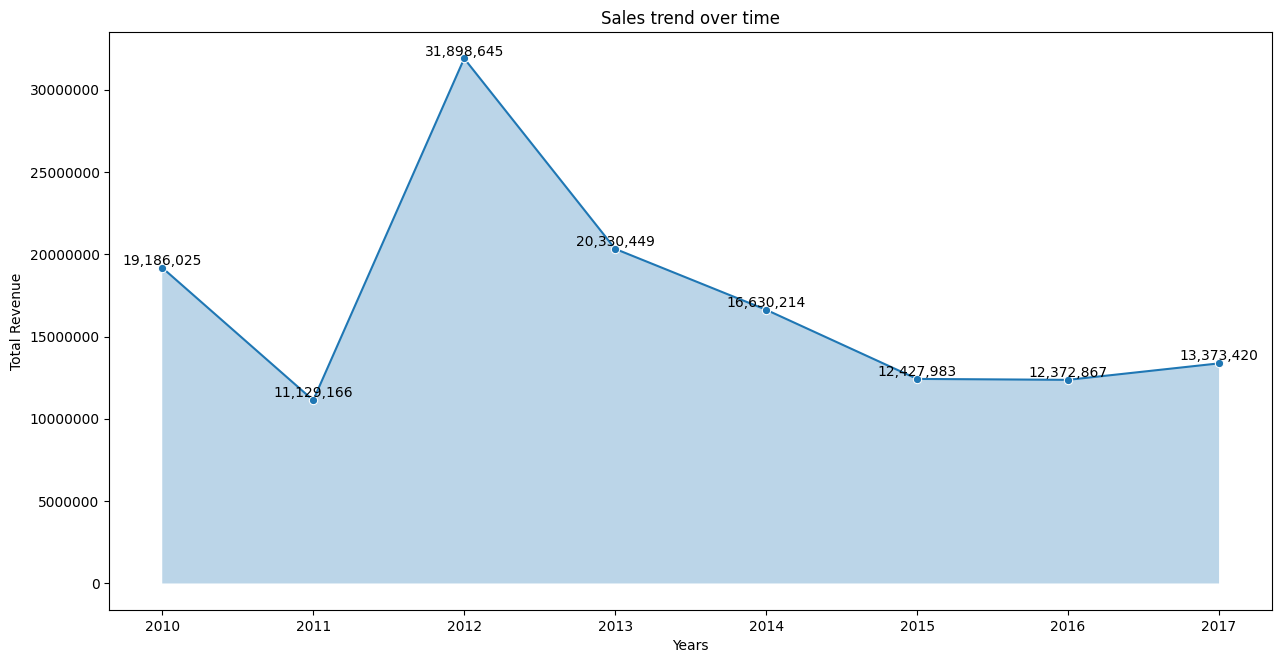

In [ ]:
# Sales trend overtime revenue

year_revenue = df.groupby('year')[['total_revenue']].sum()

# use reset_index to change yaer back to a column, do this after grouping and summing.
year_revenue = year_revenue.reset_index()


plt.figure(figsize=(15,7.5))
sns.lineplot(x = 'year', y= 'total_revenue' , data = year_revenue , marker = 'o')

# for filling area

plt.fill_between(year_revenue['year'], year_revenue['total_revenue'], alpha=0.3)

# for marking the values on line plot

for i in range(len(year_revenue)):
    plt.text(year_revenue['year'][i], year_revenue['total_revenue'][i],
             f'{year_revenue["total_revenue"][i]:,.0f}',
             ha='center', va='bottom',
             fontsize=10, color='black')


# plt.grid(True)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title("Sales trend over time")
plt.xlabel("Years")
plt.ylabel("Total Revenue")
plt.show()


# Observations

* Year 2011 has the Lowest revenue
* Year 2012 has Highest revenue
* After Year 2012 total revenue gradually decreases upto 2015 then from 2015 to 2016 there is a slight decrease in revenue but not significant
* From 2016 to 2017 it gradually increases


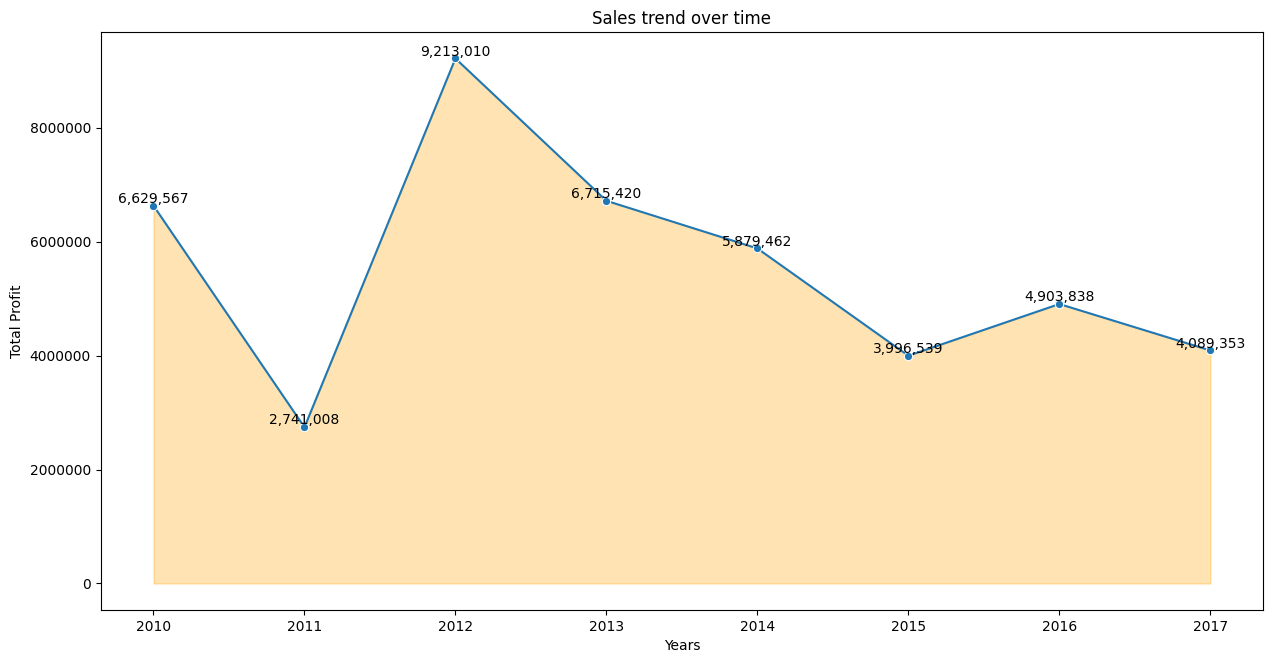

In [ ]:
# Sales trend overtime profit

year_profit = df.groupby('year')[['total_profit']].sum()

# use reset_index to change yaer back to a column, do this after grouping and summing.
year_profit = year_profit.reset_index()


plt.figure(figsize=(15,7.5))
sns.lineplot(x = 'year', y= 'total_profit' , data = year_profit , marker = 'o')

# for filling area

plt.fill_between(year_profit['year'], year_profit['total_profit'], alpha=0.3, color = 'orange')

# for marking the values on line plot

for i in range(len(year_profit)):
    plt.text(year_profit['year'][i], year_profit['total_profit'][i],
             f'{year_profit["total_profit"][i]:,.0f}',
             ha='center', va='bottom',
             fontsize=10, color='black')


# plt.grid(True)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title("Sales trend over time")
plt.xlabel("Years")
plt.ylabel("Total Profit")
plt.show()

# Observations
 * Highest profit year 2012
 * Lowest is 2011
 * There is a decrease after 2012 and then there is slight peak at 2016 and then dips

Text(0, 0.5, 'Total Profit')

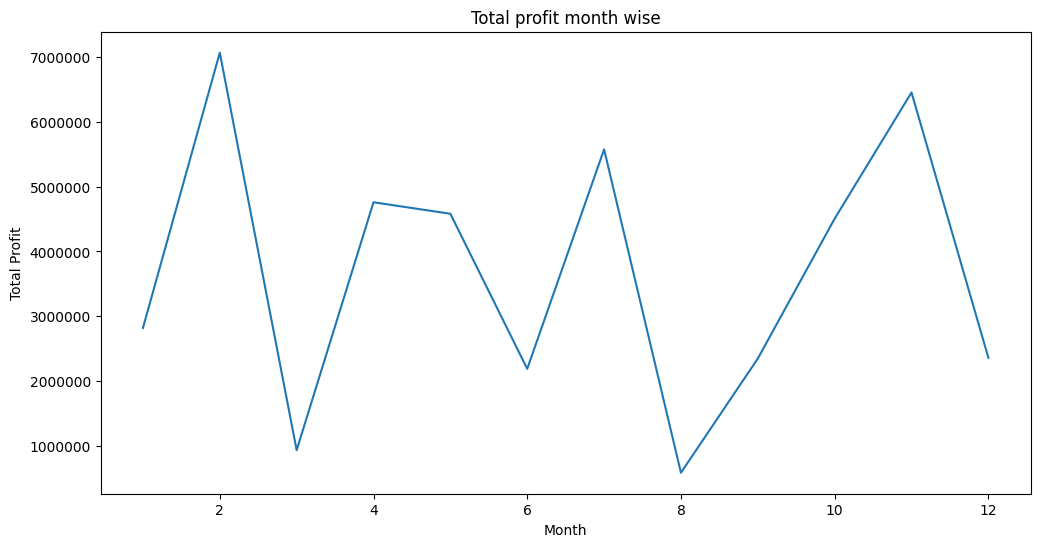

In [ ]:
# month wise profit

month_profit = df.groupby('month')[['total_profit']].sum().reset_index()

plt.figure(figsize =(12,6))
sns.lineplot(x= 'month', y ='total_profit', data = month_profit)

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

plt.title("Total profit month wise")
plt.xlabel("Month")
plt.ylabel("Total Profit")




# Observations
* Month 2 has the most profit
* Month 8 has the lowest profit
* There is a huge dip after month 2 to month 3 and few other months

<ipython-input-31-df0c8ef080b7>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x= 'total_profit' , y = 'region' , data = region_profit, palette = palette)


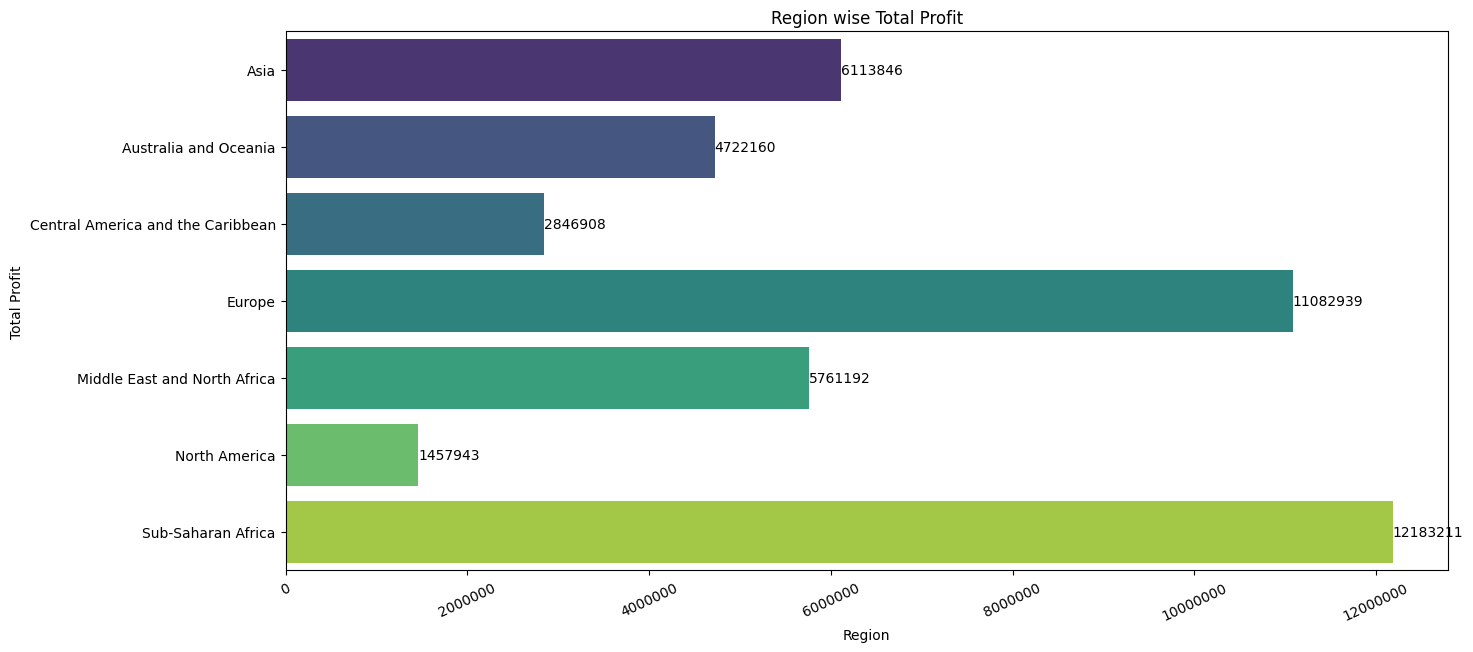

In [ ]:
# Region with most profit

region_profit = df.groupby('region')[['total_profit']].sum()

region_profit = region_profit.reset_index()


plt.figure(figsize = (15,7))

# color palette

palette = sns.color_palette("viridis", len(region_profit))

ax = sns.barplot(x= 'total_profit' , y = 'region' , data = region_profit, palette = palette)

# to disable scientific notation on the y axis

plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)

# Add labels to the bars
# use ax.bar_label to add labels.
# The fmt='%.0f' parameter ensures that the labels are formatted as plain numbers without scientific notation.

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

plt.title('Region wise Total Profit')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.xticks(rotation = 25)

plt.show()

# Observations

### Top 3 regions Total Profit wise are,
 1. Sub-Saharan Africa
 2. Europe
 3. Asia

### Bottom most region Total Profit wise is,
  1. North America

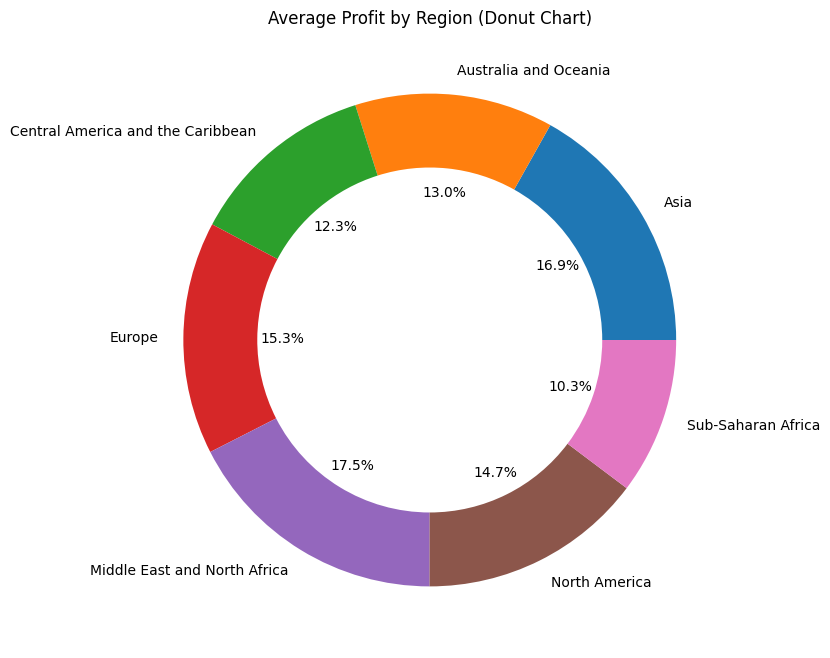

In [ ]:
# pie chart for average total profit by region

region_avgprof = df.groupby('region')[['total_profit']].mean().reset_index()

labels = region_avgprof['region']
sizes = region_avgprof['total_profit']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0, wedgeprops=dict(width=0.3))
plt.title('Average Profit by Region (Donut Chart)')
plt.show()


# Observations
### Top regions average profit wise,
1. Middle East and North Africa
2. Asia
3. Europe

### Bottom region average profit wise,
1. Sub-Saharan Africa


<ipython-input-33-82b0c602b204>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= 'total_revenue', y = 'item_type', data = item_revenue, palette= 'Set2' )


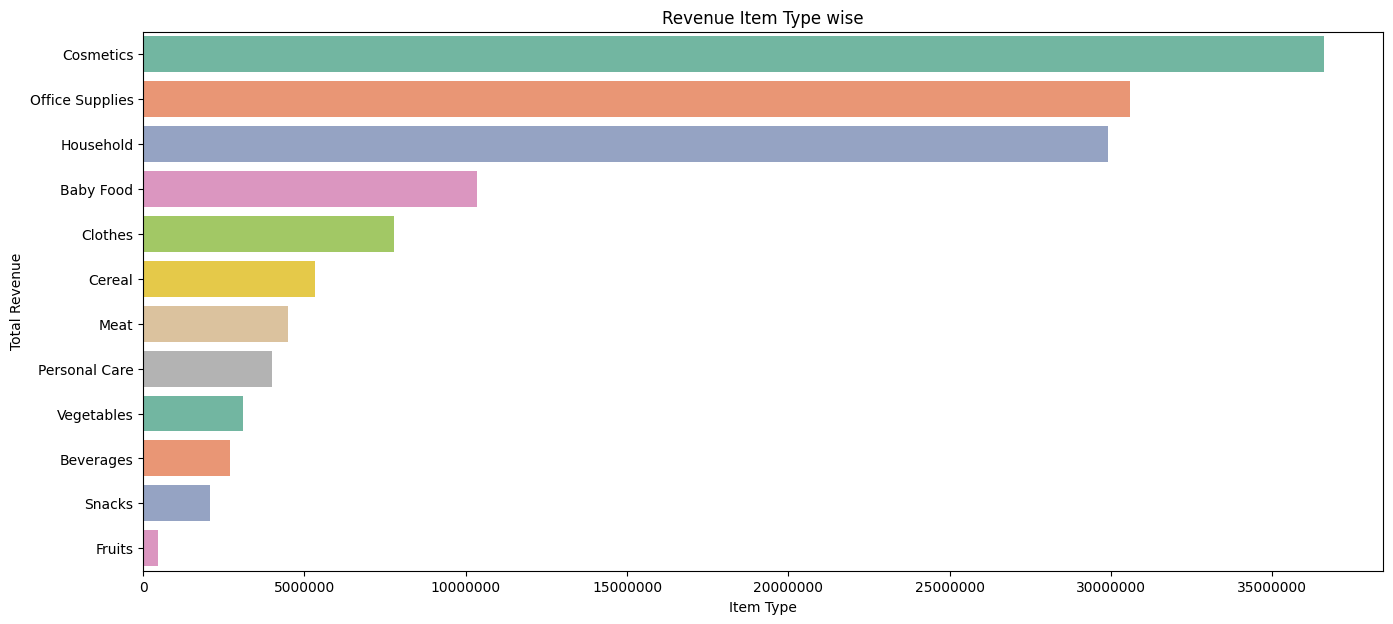

In [ ]:
# Item_Type wise Revenue

item_revenue = df.groupby(['item_type'])['total_revenue'].sum().sort_values(ascending = False)

item_revenue = item_revenue.reset_index()


plt.figure(figsize=(16,7))
sns.barplot(x= 'total_revenue', y = 'item_type', data = item_revenue, palette= 'Set2' )

plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)


plt.title("Revenue Item Type wise")
plt.xlabel("Item Type")
plt.ylabel("Total Revenue")
plt.show()


# Observations
### Top 3 Items revenue wise,
1. Cosmetics
2. Office Supplies
3. Household

### Bottom 3 Items,
1. Fruits
2. Snacks
3. Beverages

<ipython-input-34-f642625c614e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x= 'item_type', y = 'total_profit', data = item_profit, palette = "magma")


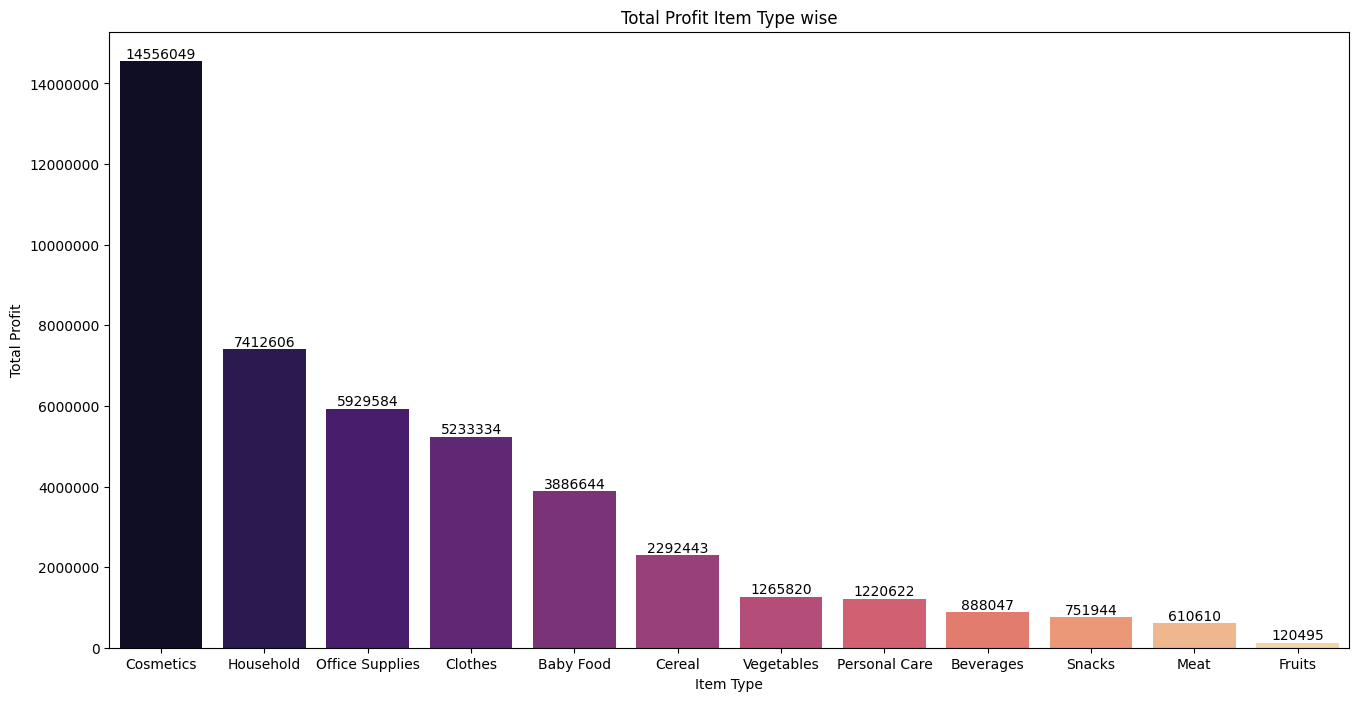

In [ ]:
# Item_Type wise Profit

item_profit = df.groupby(['item_type'])['total_profit'].sum().sort_values(ascending = False)

item_profit = item_profit.reset_index()

plt.figure(figsize=(16,8))
ax2 = sns.barplot(x= 'item_type', y = 'total_profit', data = item_profit, palette = "magma")

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

for container in ax2.containers:
  ax2.bar_label(container, fmt = '%.0f')


plt.title("Total Profit Item Type wise")
plt.xlabel("Item Type")
plt.ylabel("Total Profit")
plt.show()

# Observations
### Top 3 items Profit wise ,
1. Cosmetics
2. Household
3. Office Supplies

### Bottom 3,
1. Fruits
2. Meat
3. Snacks

<ipython-input-35-840966772430>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'item_type', y = 'units_sold', data = item_sold, palette = "Dark2")


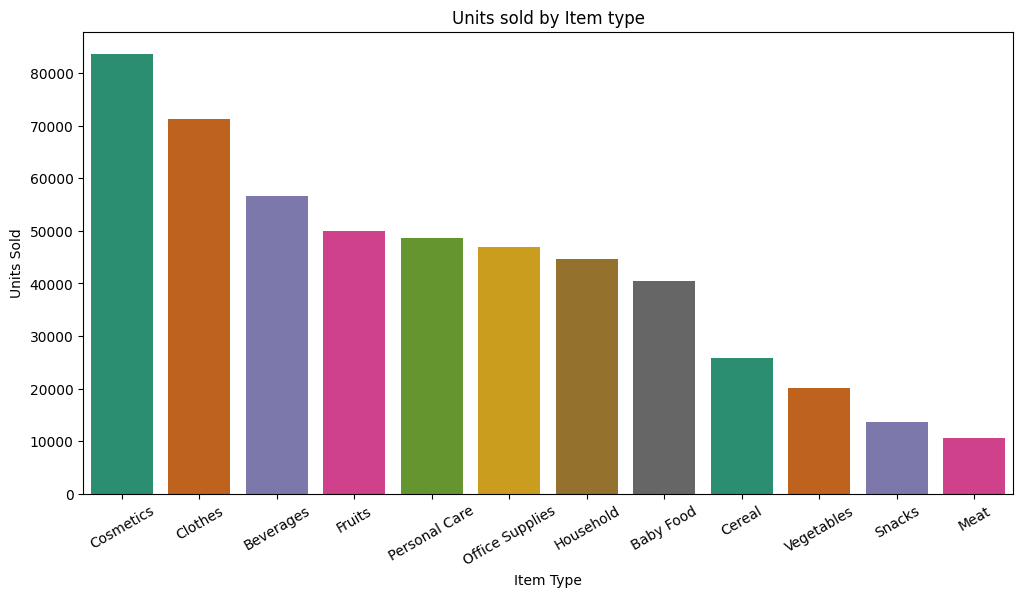

In [ ]:
# Item type wise Units Sold

item_sold = df.groupby('item_type')[['units_sold']].sum().sort_values(ascending = False, by = 'units_sold').reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x = 'item_type', y = 'units_sold', data = item_sold, palette = "Dark2")

plt.title("Units sold by Item type")
plt.xlabel('Item Type')
plt.ylabel('Units Sold')
plt.xticks(rotation = 30)
plt.show()


# Observations
### Top items units_sold wise,
1. Cosmetics
2. Clothes
3. Beverages

### Bottom 3 items,
1. Meat
2. Snacks
3. Vegetables

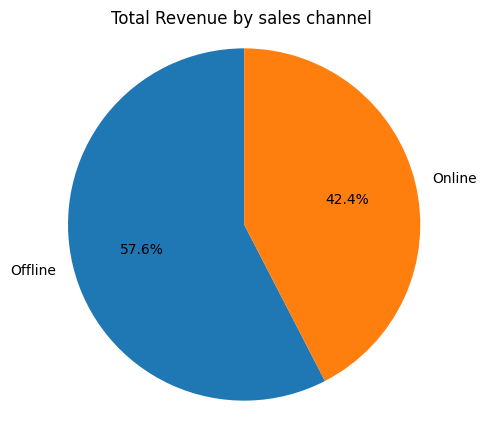

In [ ]:
# sales channel revenue

sales_channel_revenue = df.groupby('sales_channel')['total_revenue'].sum().reset_index()

plt.figure(figsize=(5,5))
plt.pie(sales_channel_revenue['total_revenue'], labels = sales_channel_revenue['sales_channel'], autopct='%1.1f%%', startangle=90)
plt.title('Total Revenue by sales channel ')
plt.axis('equal')
plt.show()

# Observation
- 57.6% revenue is generated from Offline sales channel

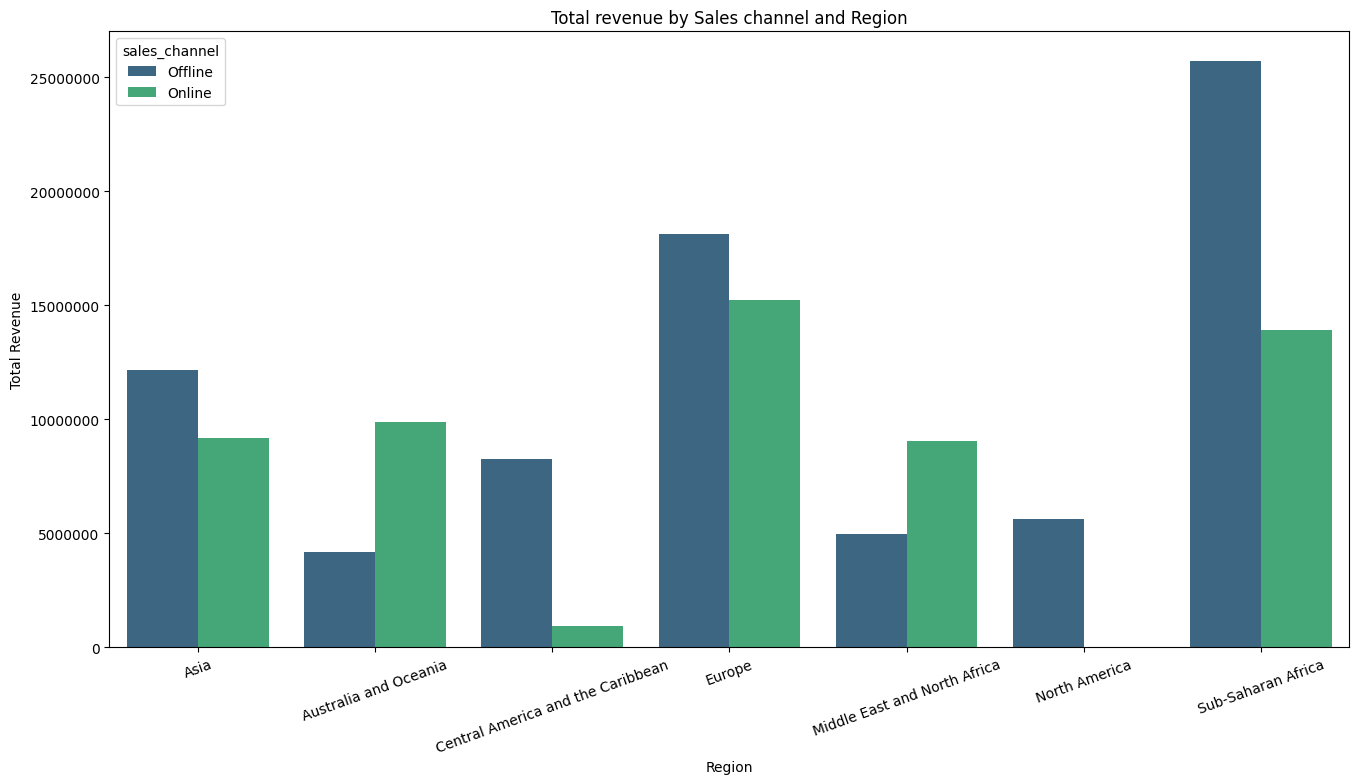

In [ ]:
# grouped bar plot showing total revenue by sales channel and region

sc_reg_rev = df.groupby(['region', 'sales_channel'])['total_revenue'].sum().reset_index()

plt.figure(figsize=(16,8))
sns.barplot(x = 'region', y = 'total_revenue', hue = 'sales_channel', palette = 'viridis', data = sc_reg_rev)

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

plt.title("Total revenue by Sales channel and Region")
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.xticks(rotation = 20)
plt.show()



# Observations
### Regions which have generated more revenue from Offline Sales Channel
1. Sub-Saharan Africa
2. Europe
3. Asia
4. Central America and the Carribean

### Regions which have generated more revenue from Online Sales Channel
1. Australia and Ocenia
2. Middle East and North Africa


- North America is the only region which does not have any revenue generated through Online Sales channel , All the revenue is from its Offline sales channel.


<Axes: xlabel='region', ylabel='total_revenue'>

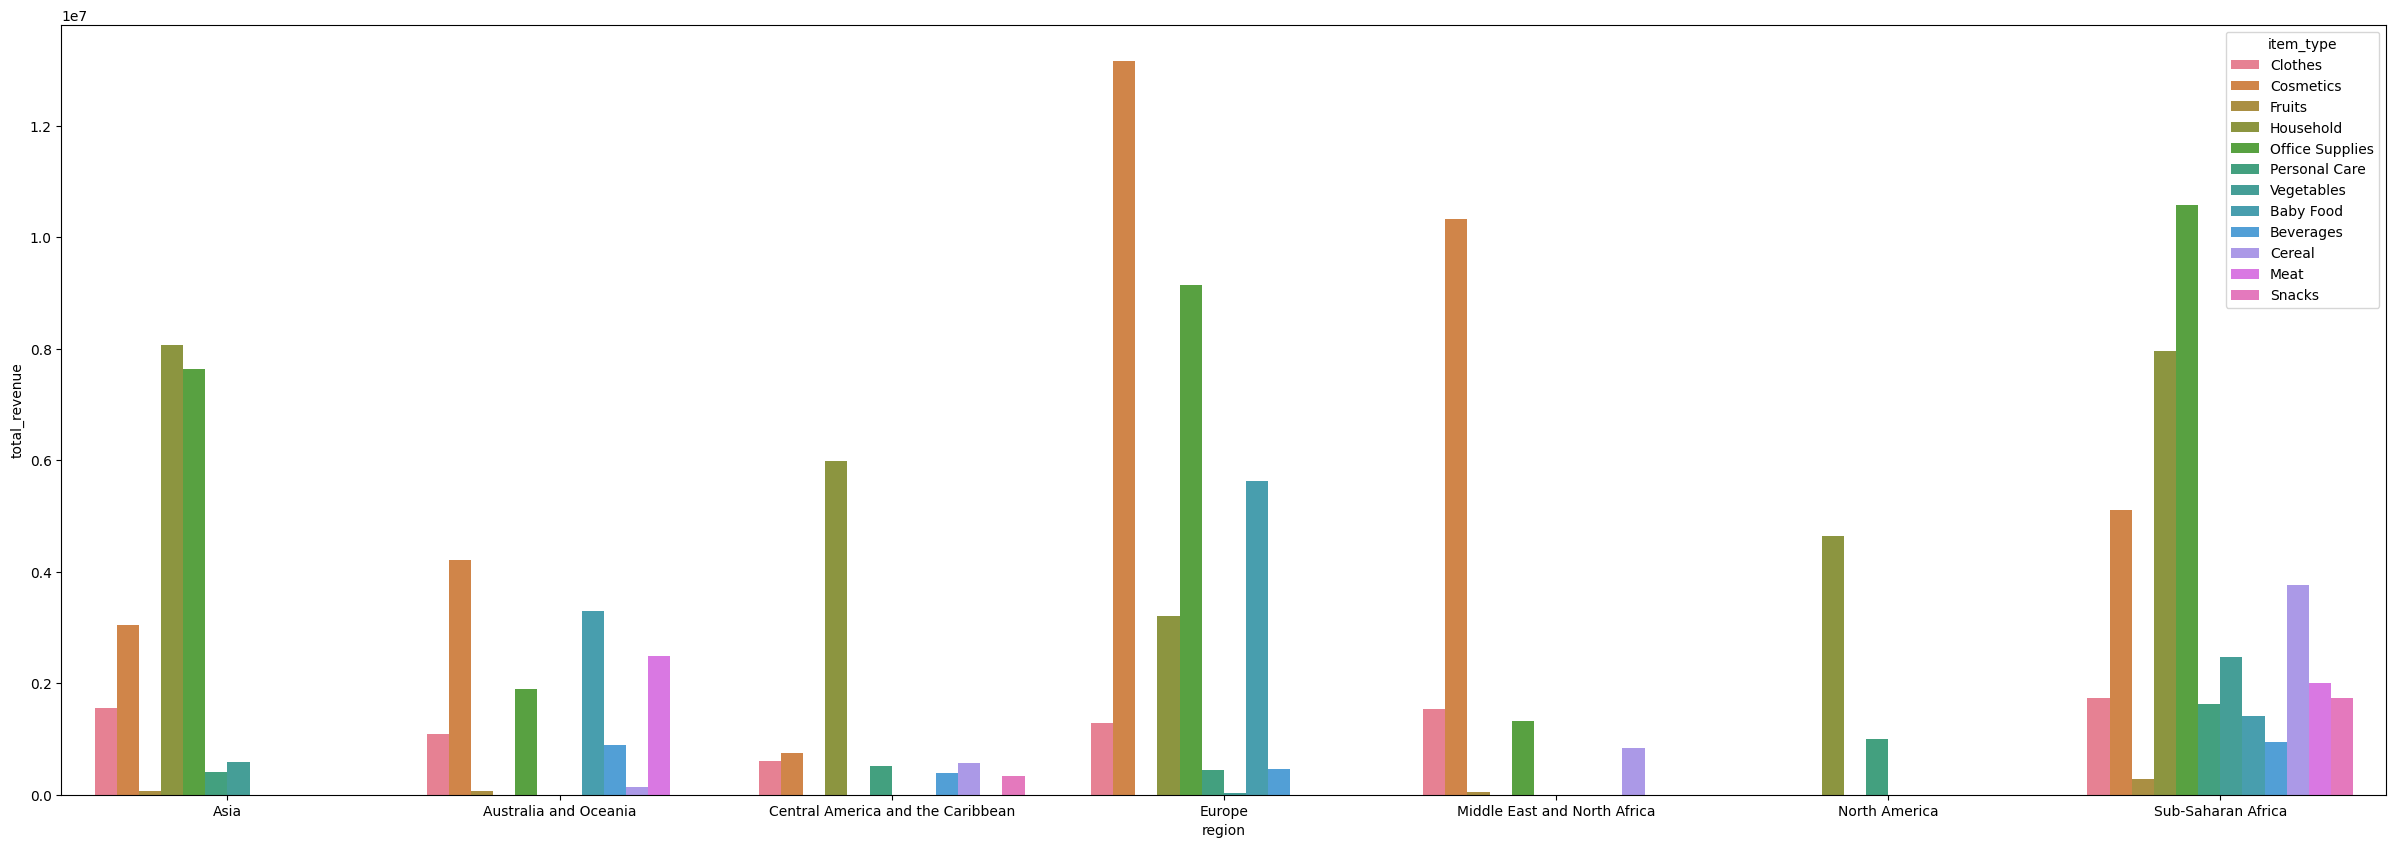

In [ ]:
# Total revenue by Region and Item type

region_item_rev = df.groupby(['region', 'item_type'])['total_revenue'].sum().reset_index()

plt.figure(figsize=(30,10))
sns.barplot(x='region', y='total_revenue', hue='item_type', data = region_item_rev)



# Observations
### Top items which generated revenue by Region,
* **COSMETICS**         
 - Europe
 - Middle East and North Africa
 - Australia and Ocenaia

* **HOSUEHOLD**
 - Asia
 - Central America and Caribbean
 - North America

* **OFFICE SUPPLIES**
 - Sub-Saharan Africa


<Axes: xlabel='region', ylabel='units_sold'>

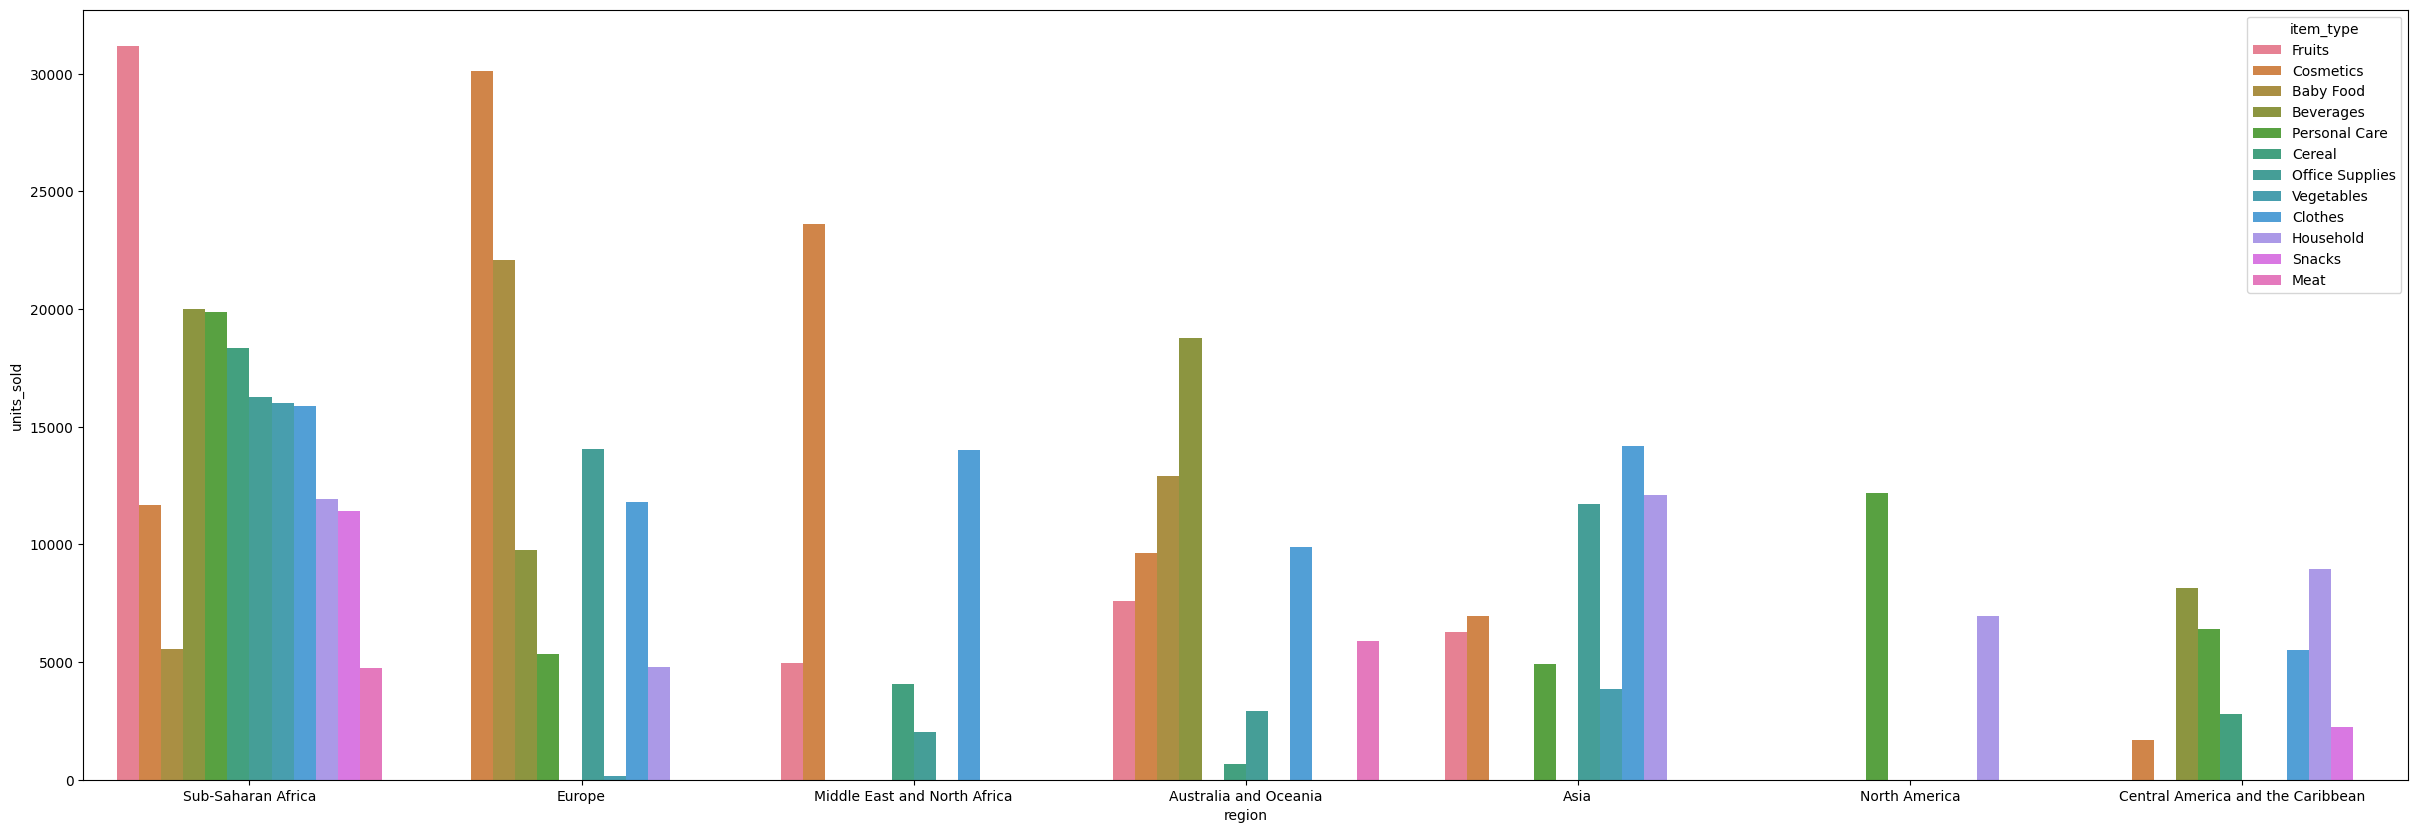

In [ ]:
# Units sold by item type and region

region_item_sold = df.groupby(['region', 'item_type'])['units_sold'].sum().sort_values(ascending =False).reset_index()

region_item_sold

plt.figure(figsize=(30,10))
sns.barplot(x='region', y='units_sold', hue='item_type', data = region_item_sold)

# Observations

## Top items units sold by region,
- **FRUITS**
 * Sub-Saharan Africa

- **COSMETICS**
 - Europe
 * Middle East and North Africa

- **BEVERAGES**
 * Australia and Oceania

- **CLOTHES**
 * Asia

- **PERSONAL CARE**
 * North America

- **HOUSEHOLD**
 * Central America and the Caribbean

- **North America** has sold only two item types they are,
 * Household
 * Personal care

The only region which has sold all the item type is Sub Saharan Africa
all the other regions except North America has sold atleast 5 Item Types.

# Recommendations based on Analysis

## General Recommendations:

### 1. **Focus on High Revenue and High Profit Regions:**
   - **Sub-Saharan Africa, Europe, and Asia**: These regions are the top performers in terms of total profit. Further investment in marketing and expanding product availability in these regions can yield higher returns.
   - **Middle East and North Africa**: Despite being in the top for average profit, their total profit is not as high, indicating potential for growth. Consider targeted strategies to boost sales volume.

### 2. **Address Low Performing Regions:**
   - **North America**: This region is the lowest in total profit. One reason could be it only has sold 2 item types namely Household and Personal care and Second reason could be it generates revenue only from offline sales.  Consider increasing online sales efforts since North America currently generates all its revenue from offline sales.
   
### 3. **Seasonal Strategies:**
   - **Low Revenue/Profit Months (e.g., February and August)**: Implement promotions or new product launches during these months to counteract the dip in sales and profits.

## Product-Specific Recommendations:

### 4. **High-Performing Items:**
   - **Cosmetics, Office Supplies, Household Items**: These items are top performers in both revenue and profit. Consider expanding the product lines, increasing inventory, and marketing these items more aggressively.
   
### 5. **Low-Performing Items:**
   - **Fruits, Snacks, Beverages**: These items are at the bottom in terms of revenue and profit. Re-evaluate the marketing strategies, pricing, or even the necessity of continuing these product lines. Consider promotions to clear out existing stock or reposition these items in the market.

## Channel-Specific Recommendations:

### 6. **Offline Sales:**
   - **Strengthen Offline Channels**: Since 57.6% of revenue comes from offline sales, it’s crucial to maintain strong relationships with offline distributors and continue investing in offline marketing campaigns, especially in high-performing regions.

### 7. **Boost Online Sales:**
   - **North America**: Since it currently has no online revenue, initiating online sales strategies can potentially tap into a new revenue stream.
   - **Australia and Oceania, Middle East and North Africa**: These regions perform well online. Continue to develop and invest in online marketing strategies here to further increase sales.

## Trend Analysis Recommendations:

### 8. **Addressing the Dip in Sales and Profit After 2012:**
   - **Identify Causes**: Conduct a deeper investigation to understand the reasons for the decrease in sales and profit after 2012. This might involve analyzing market trends, economic conditions, competition, and internal factors.
   - **Strategic Adjustments**: Based on findings, make necessary adjustments to strategies, which could include product diversification, pricing adjustments, marketing campaigns, or entering new markets.

## Operational Efficiency:

### 9. **Inventory Management:**
   - **High Volume Items**: Ensure that high-volume items like cosmetics and clothes have sufficient stock levels to meet demand and avoid stockouts.
   - **Low Volume Items**: Implement just-in-time inventory strategies for low-volume items to reduce holding costs.

### 10. **Cost Management:**
  - **Unit Cost and Unit Price Analysis**: Regularly review and adjust the unit cost and pricing strategy to ensure profitability. Consider bulk purchasing, supplier negotiations, or cost-cutting measures for high-cost items.

 By addressing these areas, the business can enhance its performance, increase revenue and profit margins, and ensure sustainable growth across different regions and product lines.    

## Recommendations Based on Regional Sales Data

### 1. **Focus on High-Revenue Items per Region**
   -  **Cosmetics:**
     - **Europe, Middle East and North Africa, Australia and Oceania:**
       - Enhance marketing efforts for cosmetics in these regions by leveraging local influencers and beauty bloggers.
       - Introduce limited edition or region-specific cosmetic products to attract more customers.
       - Increase the variety and stock of popular cosmetic products to meet growing demand.

   - **Household Items:**
     - **Asia, Central America and Caribbean, North America:**
       - Expand the range of household items, including sustainable and eco-friendly options, to attract a broader customer base.
       - Offer bundle deals and discounts on household items to boost sales.
       - Invest in targeted advertising campaigns focusing on household products.

   - **Office Supplies:**
     - **Sub-Saharan Africa:**
       - Promote office supplies through partnerships with local businesses and educational institutions.
       - Offer bulk purchase discounts to attract corporate clients.
       - Introduce new and innovative office products to keep the category appealing.

### 2. **Leverage High Unit Sales Items per Region**
   - **Fruits in Sub-Saharan Africa:**
     - Optimize supply chain and reduce costs to increase profitability from high-volume fruit sales.
     - Introduce organic and exotic fruit options to attract health-conscious consumers.
   
   - **Cosmetics in Europe and Middle East and North Africa:**
     - Launch new cosmetic lines and capitalize on the high demand.
     - Offer loyalty programs and incentives to retain customers.

   - **Beverages in Australia and Oceania:**
     - Introduce new beverage flavors and health-oriented drinks to diversify the product range.
     - Partner with local cafes and restaurants to boost sales through B2B channels.

   - **Clothes in Asia:**
     - Collaborate with local designers and brands to offer exclusive clothing lines.
     - Increase promotional activities during festive seasons to drive higher sales volumes.

   - **Personal Care in North America:**
     - Expand the personal care product line to include more diverse and trendy items.
     - Offer personalized skincare and beauty solutions to attract more customers.

   - **Household in Central America and the Caribbean:**
     - Promote household items through home improvement and lifestyle shows.
     - Introduce smart home products to tap into the growing market for home automation.

### 3. **Product and Sales Channel Optimization**
   - **Sub-Saharan Africa:**
     - Continue to diversify the product offerings, considering the region's capability to sell all item types.
     - Invest in both online and offline sales channels to reach a wider audience.

   - **North America:**
     - Expand the product range beyond household and personal care items to include other high-demand categories.
     - Evaluate customer preferences and market trends to introduce new product lines.
     - Explore opportunities to enhance online sales channels to increase reach and convenience for customers.

### 4. **Promotional and Marketing Strategies**
   - **Targeted Promotions:**
     - Implement region-specific promotions based on high-revenue and high-volume items.
     - Use data-driven insights to tailor marketing messages and offers to customer preferences in each region.

   - **Customer Engagement:**
     - Engage customers through social media campaigns, loyalty programs, and feedback surveys to build brand loyalty.
     - Offer personalized recommendations and deals based on customers' purchase history and preferences.

### 5. **Inventory Management**
   - **Optimize Stock Levels:**
     - Ensure adequate stock levels for high-demand items in each region to ### avoid stockouts.
     - Use predictive analytics to forecast demand and adjust inventory accordingly.

By focusing on these recommendations, Amazon can enhance its regional sales strategies, improve customer satisfaction, and drive higher revenues and profits across different markets.